# Scatterplot To Analyse Correlation Between Resale Price vs Floor area and Remaining Years Using HDB Dataset

In [1]:
# import the necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # Format the y-axis to display normal values


In [2]:
# Analysing correlation between floor area and resale price

In [13]:
filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('floor_area_sqm', 'i8'), ('resale_price', 'i8')], 
                     delimiter=',',
                     usecols=(6, 10),
                     missing_values=['na', '-', 'NA'], filling_values=0)

print(data[:10])
print(data.dtype)
print(data.shape)

[(44, 232000) (67, 250000) (67, 262000) (68, 265000) (67, 265000)
 (68, 275000) (68, 280000) (67, 285000) (68, 285000) (67, 285000)]
[('floor_area_sqm', '<i8'), ('resale_price', '<i8')]
(181874,)


In [14]:
# filter out all rows where ‘floor_area_sqm’ and ‘resale_price’ are either zero or missing

valid_rows = (~np.isnan(data['floor_area_sqm'])) & (data['floor_area_sqm'] > 0) & (~np.isnan(data['resale_price'])) & (data['resale_price'] > 0)

floor_area_sqm = data[valid_rows]['floor_area_sqm']
resale_price = data[valid_rows]['resale_price']

print(floor_area_sqm[:10])
print(resale_price[:10])
print()
print(floor_area_sqm.dtype)
print(resale_price.dtype)
print()
print(floor_area_sqm.shape)
print(resale_price.shape)

[44 67 67 68 67 68 68 67 68 67]
[232000 250000 262000 265000 265000 275000 280000 285000 285000 285000]

int64
int64

(181728,)
(181728,)


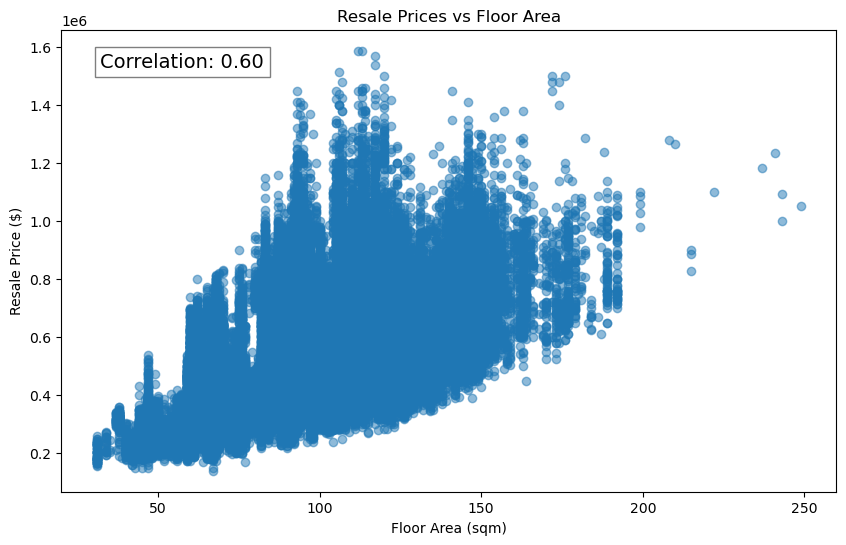

In [18]:
# create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(floor_area_sqm, resale_price, alpha=0.5)
plt.title("Resale Prices vs Floor Area")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price ($)")

# Add correlation coefficient text to the plot
correlation_matrix = np.corrcoef(floor_area_sqm, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

plt.text(0.05, 0.95, f"Correlation: {correlation_coefficient:.2f}", 
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.5))

# Save the plot to a file
plt.savefig('Scatterplot - Resale Price vs Floor Area.png', dpi=300, bbox_inches='tight')

plt.show()

In [6]:
"""
# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(floor_area_sqm, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

# Print the correlation coefficient
print(f"Correlation coefficient between floor area (sqm) and resale price: {correlation_coefficient}")

"""

Correlation coefficient between floor area (sqm) and resale price: 0.5989625527779053


In [ ]:
# Analysing correlation between remaining le1ase and resale price

In [24]:
filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('remaining_lease', 'U50'), ('resale_price', 'i8')], 
                     delimiter=',',
                     usecols=(9, 10),
                     missing_values=['na', '-', 'NA'], filling_values=0)

print(data[:10])
print(data.dtype)
print(data.shape)

[('61 years 04 months', 232000) ('60 years 07 months', 250000)
 ('62 years 05 months', 262000) ('62 years 01 month', 265000)
 ('62 years 05 months', 265000) ('63 years', 275000)
 ('61 years 06 months', 280000) ('58 years 04 months', 285000)
 ('61 years 06 months', 285000) ('61 years 04 months', 285000)]
[('remaining_lease', '<U50'), ('resale_price', '<i8')]
(181874,)


In [25]:
# manipulate column remaining_lease from text to numeric year only
years_only = np.array([int(lease.split()[0]) for lease in data['remaining_lease']])

print(years_only[:10])
print()
print(years_only.dtype)
print()
print(years_only.shape)

[61 60 62 62 62 63 61 58 61 61]

int32

(181874,)


In [26]:
#valid_rows = (~np.isnan(data['years_only'])) & (data['years_only'] > 0) & (~np.isnan(data['resale_price'])) & (data['resale_price'] > 0)

#remaining_years = data[valid_rows]['years_only']
#resale_price = data[valid_rows]['resale_price']

valid_rows = (~np.isnan(years_only)) & (years_only > 0) & (~np.isnan(data['resale_price'])) & (data['resale_price'] > 0)

remaining_years = years_only[valid_rows]
resale_price = data[valid_rows]['resale_price']

print(remaining_years[:10])
print(resale_price[:10])
print()
print(remaining_years.dtype)
print(resale_price.dtype)
print()
print(remaining_years.shape)
print(resale_price.shape)

[61 60 62 62 62 63 61 58 61 61]
[232000 250000 262000 265000 265000 275000 280000 285000 285000 285000]

int32
int64

(181829,)
(181829,)


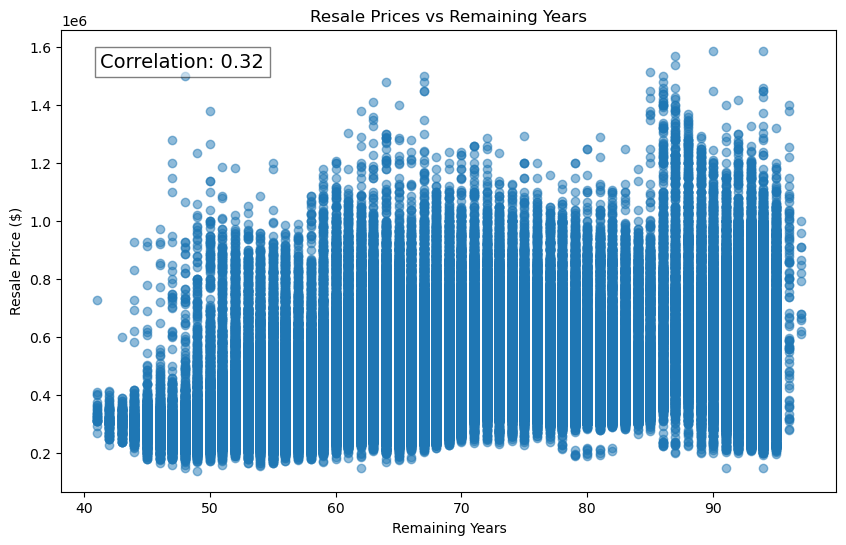

In [27]:
# create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(remaining_years, resale_price, alpha=0.5)
plt.title("Resale Prices vs Remaining Years")
plt.xlabel("Remaining Years")
plt.ylabel("Resale Price ($)")

# Add correlation coefficient text to the plot
correlation_matrix = np.corrcoef(remaining_years, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

plt.text(0.05, 0.95, f"Correlation: {correlation_coefficient:.2f}", 
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.5))

# Save the plot to a file
plt.savefig('Scatterplot - Resale Price vs Remaining Years.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
"""
# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(remaining_years, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

# Print the correlation coefficient
print(f"Correlation coefficient between floor area (sqm) and resale price: {correlation_coefficient}")
"""

Correlation coefficient between floor area (sqm) and resale price: 0.3219350852865802
